In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [10]:
import yfinance as yf
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327446,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676094,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095566,144114400


In [14]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [15]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


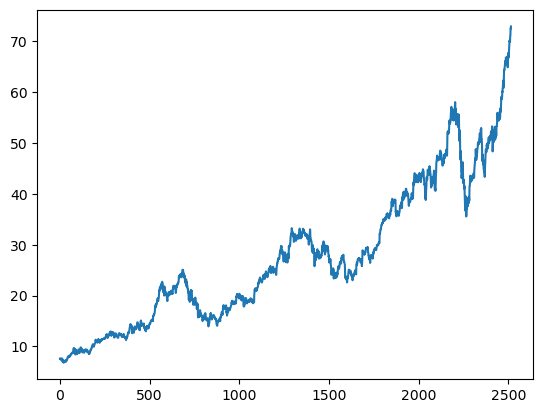

In [17]:
plt.plot(df.Close)

In [18]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

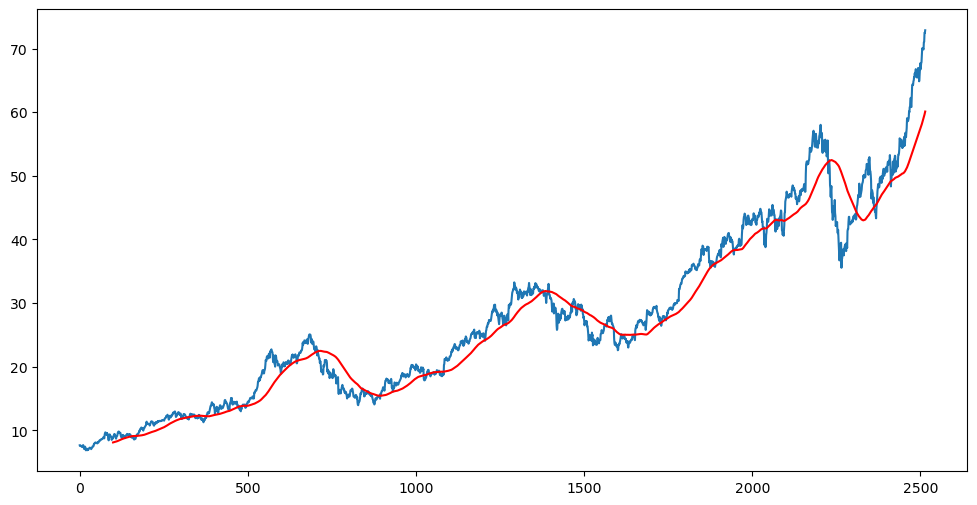

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [23]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

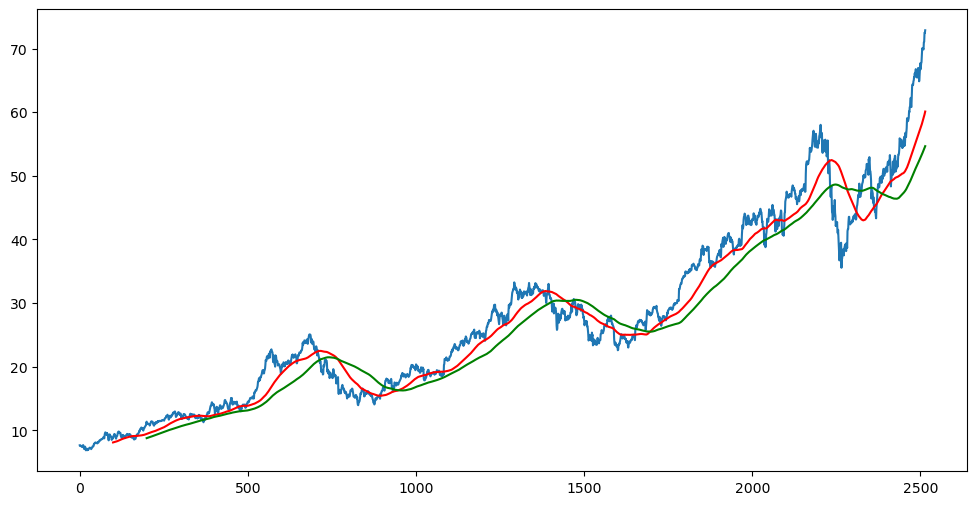

In [24]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [26]:
df.shape

(2515, 5)

In [27]:
# Splitting for training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [28]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [29]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [30]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scalar.fit_transform(data_training)
data_training_array.shape

(1760, 1)

In [35]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [43]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [45]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 22s 265ms/step - loss: 0.0699
Epoch 2/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0129
Epoch 3/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0109
Epoch 4/50
52/52 [==============================] - 13s 249ms/step - loss: 0.0091
Epoch 5/50
52/52 [==============================] - 13s 255ms/step - loss: 0.0084
Epoch 6/50
52/52 [==============================] - 13s 252ms/step - loss: 0.0079
Epoch 7/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0081
Epoch 8/50
52/52 [==============================] - 13s 249ms/step - loss: 0.0079
Epoch 9/50
52/52 [==============================] - 13s 251ms/step - loss: 0.0085
Epoch 10/50
52/52 [==============================] - 13s 257ms/step - loss: 0.0075
Epoch 11/50
52/52 [==============================] - 13s 255ms/step - loss: 0.0070
Epoch 12/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0073
Epoch 13/50
5

In [46]:
model.save('keras_model.keras')

C:\Users\Suryansh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [48]:
past_100_days = data_training.tail(100)

In [49]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\Suryansh\AppData\Local\Temp\ipykernel_28284\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [50]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [53]:
input_data = scalar.fit_transform(final_df)
input_data.shape

(855, 1)

In [54]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [55]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [56]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [57]:
# Making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 109ms/step


In [58]:
y_predicted.shape

(755, 1)

In [60]:
y_predicted

array([[0.10210217],
       [0.10256327],
       [0.10299087],
       [0.10337532],
       [0.10370597],
       [0.1039778 ],
       [0.1041938 ],
       [0.10435324],
       [0.10445814],
       [0.104519  ],
       [0.10454345],
       [0.10454408],
       [0.1045306 ],
       [0.10451353],
       [0.10450173],
       [0.10450242],
       [0.10451911],
       [0.10455431],
       [0.10461183],
       [0.10469128],
       [0.10479531],
       [0.10492316],
       [0.1050698 ],
       [0.10524267],
       [0.10545218],
       [0.10570928],
       [0.10602733],
       [0.10643153],
       [0.1069493 ],
       [0.10760865],
       [0.10847716],
       [0.109679  ],
       [0.11123608],
       [0.11316071],
       [0.11551359],
       [0.11831343],
       [0.12151185],
       [0.12499772],
       [0.12870356],
       [0.13256055],
       [0.1364757 ],
       [0.14043576],
       [0.14439861],
       [0.14831942],
       [0.15208949],
       [0.15569441],
       [0.15914765],
       [0.162

In [61]:
scalar.scale_

array([0.02123255])

In [63]:
scale_factor = 1 / 0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

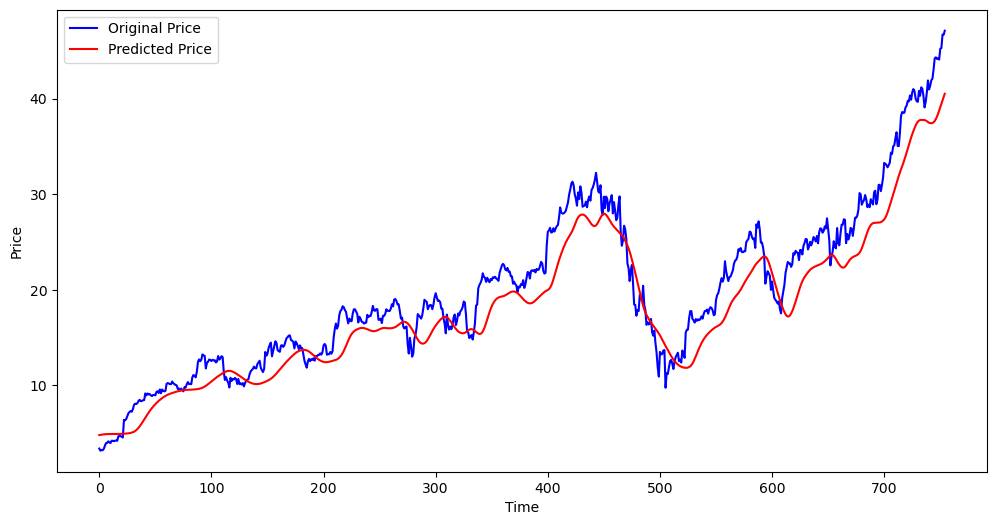

In [67]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()